<IPython.core.display.Javascript object>


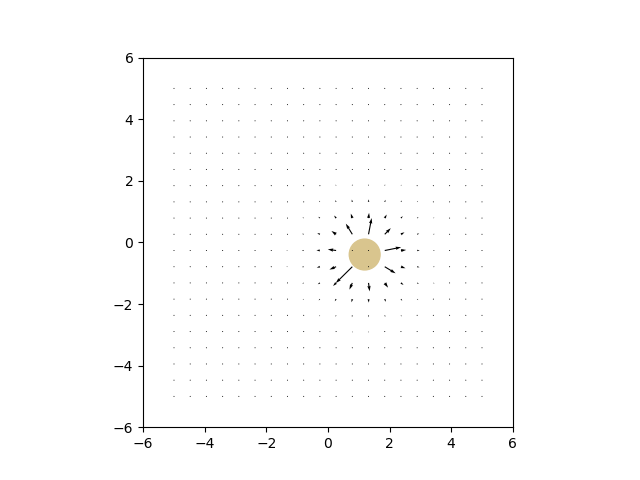

BoundedIntText(value=1, description='Anzahl Ladungen', max=10, min=1)

FloatSlider(value=0.1, description='Ladungsbetrag', max=1.0, min=-1.0)

11

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_aspect('equal')

#create initial charges
radius = 0.5
charges = [{'object': plt.Circle((0.0, 0.0), radius, color=list(np.random.ranf(size=3))), 'charge': 0.1}]
edited_charge = 0
dragging = False


#draw all charges
for i in charges:
    ax.add_patch(i['object'])

#generate field
def field(x, y, charges):
    Ex = 0.0
    Ey = 0.0
    
    for i, charge in enumerate(charges):
        rx = charge['object'].get_center()[0] - x
        ry = charge['object'].get_center()[1] - y
        r2 = rx*rx + ry*ry
        r = np.sqrt(r2)
        
        nx = -rx / r
        ny = -ry / r
        
        #if r2 >= radius*radius:
        Ex += charge['charge'] / r2 * nx * (r2>radius*radius)
        Ey += charge['charge'] / r2 * ny * (r2>radius*radius)
        
        #print(Ex)
        
    return Ex, Ey
    
x, y = np.meshgrid(np.linspace(-5,5,20), np.linspace(-5,5,20))
u, v = field(x, y, charges)
field_plot = ax.quiver(x, y, u, v, scale=5)

#create widgets
def onchangenumber(change):
    if change['name'] == 'value':
        if change['old'] < change['new']:
            charges.append({'object': plt.Circle((np.random.ranf()*10.0-5.0, np.random.ranf()*10.0-5.0), radius, color=list(np.random.ranf(size=3))), 'charge': 0.1})
            ax.add_patch(charges[-1]['object'])
        
        elif change['old'] > change['new']:
            charge = charges.pop()
            charge['object'].remove()
        
        edited_charge = len(charges)
        u, v = field(x, y, charges)
        field_plot.set_UVC(u, v)
        fig.canvas.draw()
        
num_charges = widgets.BoundedIntText(value=1, min=1, max=10, step=1, description='Anzahl Ladungen')
num_charges.observe(onchangenumber)
display(num_charges)

def onchangecharge(change):
    if change['name'] == 'value':
        charges[edited_charge]['charge'] = change['new']
        u, v = field(x, y, charges)
        field_plot.set_UVC(u, v)
        fig.canvas.draw()

charge_value = widgets.FloatSlider(value=0.1, min=-1, max=1, description='Ladungsbetrag')
charge_value.observe(onchangecharge)
display(charge_value)

def onclick(event):
    global edited_charge
    global dragging
    
    #filter outside events
    if event.inaxes != ax or dragging:
        return
            
    #check if a charge is hit
    hit = -1
    for i, charge in enumerate(charges):
        if charge['object'].contains_point((event.x, event.y)):
            hit = i            
    if hit == -1:
        return
    
    edited_charge = hit
    dragging = True

    #todo: connect property update
    charge_value.value = charges[edited_charge]['charge']

def onrelease(event):
    global edited_charge
    global dragging

    dragging = False
    
def ondrag(event):
    global edited_charge
    global dragging
    global field, charges
    
    if dragging:        
        charges[edited_charge]['object'].set_center((event.xdata, event.ydata))
        
        u, v = field(x, y, charges)
        field_plot.set_UVC(u, v)
        fig.canvas.draw()

#connect the callbacks
fig.canvas.mpl_connect('button_press_event', onclick)
fig.canvas.mpl_connect('button_release_event', onrelease)
fig.canvas.mpl_connect('motion_notify_event', ondrag)


